### Salary_hike -> Build a prediction model for Salary_hike

In [5]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import seaborn as sns

In [6]:
df=pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\04_Simple_linear_regression\Salary_Data.csv')

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


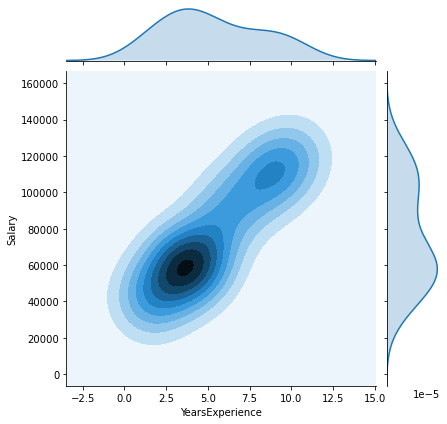

In [11]:
sns.jointplot(data=df,x='YearsExperience',y='Salary',kind='kde')

In [12]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [16]:
model=smf.ols("Salary~YearsExperience", data=df).fit()

In [19]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

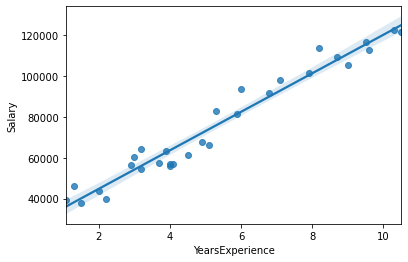

In [21]:
sns.regplot(x='YearsExperience', y='Salary', data=df)

In [22]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [50]:
newdata=pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [51]:
df_pred=pd.DataFrame(newdata,columns=["YearsExperience"])

In [58]:
df_pred.head()

,YearsExperience
0,1
1,2
2,3
3,4
4,5


In [59]:
round(model.predict(df_pred),2)

0      35242.16
1      44692.12
2      54142.09
3      63592.05
4      73042.01
5      82491.97
6      91941.94
7     101391.90
8     110841.86
9     120291.82
10    129741.79
11    139191.75
12    148641.71
13    158091.67
14    167541.64
15    176991.60
dtype: float64

In [60]:
predicted_data=pd.DataFrame(round(model.predict(df_pred),2),columns=['Salary'])

In [70]:
predicted_data["YearsExperience"]=df_pred

In [78]:
predicted_data=predicted_data.drop(['salary'],axis=1)

In [79]:
predicted_data

,Salary,YearsExperience
0,35242.16,1
1,44692.12,2
2,54142.09,3
3,63592.05,4
4,73042.01,5
5,82491.97,6
6,91941.94,7
7,101391.90,8
8,110841.86,9
9,120291.82,10
